In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("./data/STRAD.csv")
data.head()

,Time,Source,Target,Amount,Location,Type,Labels
0,0,S344054,T3139,23.00,L0201,TP082,2
1,1,S359928,T3141,332.65,L0202,TP082,2
2,2,S017501,T1334,21.93,L0516,TP130,2
3,3,S255790,T1257,85.05,L0516,TP130,2
4,4,S119160,T3141,183.13,L0202,TP082,2


array([[<AxesSubplot:title={'center':'Labels'}>]], dtype=object)

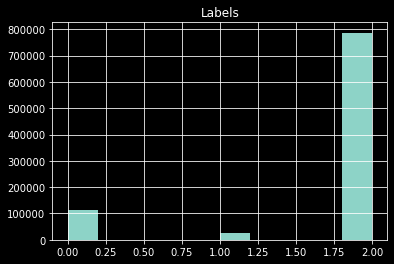

In [9]:
pd.DataFrame(data['Labels']).hist()

<AxesSubplot:>

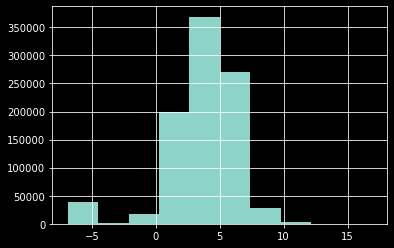

In [13]:
np.log(data['Amount'] + 1e-3).hist()

In [31]:
len(data)

927555

In [25]:
# 0标签为正常交易，1标签为欺诈交易，2标签为无标注数据
(data['Labels'] == 0).sum(), (data['Labels'] == 1).sum(), 

(113489, 27087)

In [30]:
# 有/无标签数据量
(data['Labels'] != 2).sum(), (data['Labels'] == 2).sum()

(140576, 786979)

In [15]:
(data['Amount'] == 0).sum()
# 为什么有这么多0？

38336

In [5]:
# 有多少customer
data['Source'].size / data['Source'].unique().size
# 平均每个customer两个交易记录

2.151091599760669

In [13]:
data['Source'].value_counts(ascending=True)[:int(len(data)*0.9)]

S205421       1
S388127       1
S418995       1
S130975       1
S180123       1
           ... 
S219003     646
S162170    1049
S174059    1053
S213757    1533
S323516    1592
Name: Source, Length: 431202, dtype: int64

<AxesSubplot:>

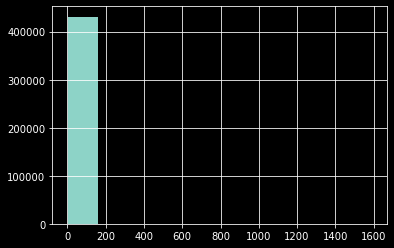

In [14]:
data['Source'].value_counts(ascending=True).hist()

In [23]:
# 多少商家
data['Target'].size / data['Target'].unique().size
# 每个商家337个交易记录

337.1701199563795

In [38]:
%load_ext autoreload
%autoreload 2
import importlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
data_with_label = data[data['Labels'] != 2]


In [57]:
import data_process as dp
importlib.reload(dp)

ret = dp.span_transaction_2d(data_with_label,[1,2,7,30])



d:\Univ\FraudDetection\my_antifraud\data_process.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Location'] = encoder_loc.transform(data['Location'])
d:\Univ\FraudDetection\my_antifraud\data_process.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Type'] = encoder_mchnt.transform(data['Type'])
  1%|▏         | 1754/117498 [00:24<27:16, 70.72it/s]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "c:\Users\bin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\bin\AppData\Local\Temp\ipykernel_74304\707839562.py", line 4, in <cell line: 4>
    ret = dp.span_transaction_2d(data_with_label,[1,2,7,30])
  File "d:\Univ\FraudDetection\my_antifraud\data_process.py", line 93, in span_transaction_2d
    new_ent = calcu_trading_entropy(
  File "d:\Univ\FraudDetection\my_antifraud\data_process.py", line 22, in calcu_trading_entropy
    amounts = np.array([data_2[data_2['Type'] == type]['Amount'].sum()
  File "d:\Univ\FraudDetection\my_antifraud\data_process.py", line 22, in <listcomp>
    amounts = np.array([data_2[data_2['Type'] == type]['Amount'].sum()
  File "c:\Users\bin\anaconda3\lib\site-packages\pandas\core\frame.py", line 3496, in __getitem__
    return self._getitem_bool_array(key)
  File "c:\Users\bin\anaconda3\lib\site-packages\pan